In [ ]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 0s (1,154 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2_amd64.deb ...
Unpacking libopenslide0 (3.4.1+dfsg-2) ...
Selecting previously unselected package openslide-tools.
Preparing to unpac

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray
import random
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def make_dir(base_path, level):
    level_dir = f'{base_path}level{level}'
    if not os.path.exists(level_dir):
        os.mkdir(level_dir)
    train_image_dir = os.path.join(level_dir,'train_image/')
    train_mask_dir = os.path.join(level_dir,'train_mask/')

    val_image_dir = os.path.join(level_dir,'val_image/')
    val_mask_dir = os.path.join(level_dir,'val_mask/')

    test_image_dir = os.path.join(level_dir,'test_image/')
    test_mask_dir = os.path.join(level_dir,'test_mask/')

    if not os.path.exists(train_image_dir):
        os.mkdir(train_image_dir)
    if not os.path.exists(train_mask_dir):
        os.mkdir(train_mask_dir)
    if not os.path.exists(val_image_dir):
        os.mkdir(val_image_dir)
    if not os.path.exists(val_mask_dir):
        os.mkdir(val_mask_dir)    
    if not os.path.exists(test_image_dir):
        os.mkdir(test_image_dir)
    if not os.path.exists(test_mask_dir):
        os.mkdir(test_mask_dir)
    return(train_image_dir, train_mask_dir, val_image_dir, val_mask_dir, test_image_dir, test_mask_dir)

def make_dir_multi(base_path, level):
    level_dir = f'{base_path}{level}level'
    if not os.path.exists(level_dir):
        os.mkdir(level_dir)
    train_image_dir = os.path.join(level_dir,'train_image/')
    train_mask_dir = os.path.join(level_dir,'train_mask/')

    val_image_dir = os.path.join(level_dir,'val_image/')
    val_mask_dir = os.path.join(level_dir,'val_mask/')

    test_image_dir = os.path.join(level_dir,'test_image/')
    test_mask_dir = os.path.join(level_dir,'test_mask/')

    if not os.path.exists(train_image_dir):
        os.mkdir(train_image_dir)
    if not os.path.exists(train_mask_dir):
        os.mkdir(train_mask_dir)
    if not os.path.exists(val_image_dir):
        os.mkdir(val_image_dir)
    if not os.path.exists(val_mask_dir):
        os.mkdir(val_mask_dir)    
    if not os.path.exists(test_image_dir):
        os.mkdir(test_image_dir)
    if not os.path.exists(test_mask_dir):
        os.mkdir(test_mask_dir)
    return(train_image_dir, train_mask_dir, val_image_dir, val_mask_dir, test_image_dir, test_mask_dir)

In [ ]:
base_path = '/content/'

train_image_dir4, train_mask_dir4, val_image_dir4, val_mask_dir4, test_image_dir4, test_mask_dir4 = make_dir(base_path, level = 4)

train_image_dir, train_mask_dir, val_image_dir, val_mask_dir, test_image_dir, test_mask_dir = make_dir_multi(base_path, level = 'multi_')

In [ ]:
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/train_mask.zip' -d /content/level4/train_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/train_image.zip' -d /content/level4/train_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/val_mask.zip' -d /content/level4/val_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/val_image.zip' -d /content/level4/val_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/test_mask.zip' -d /content/level4/test_mask/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/level4/test_image.zip' -d /content/level4/test_image/

In [ ]:
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level4/level4_train_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level4/level4_val_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/level4/level4_test_data.txt' /content/

In [ ]:
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/multi_level/train_image.zip' -d /content/multi_level/train_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/multi_level/val_image.zip' -d /content/multi_level/val_image/
!unzip -q '/content/drive/MyDrive/Applied Deep Learning/project/multi_level/test_image.zip' -d /content/multi_level/test_image/

In [ ]:
!cp '/content/drive/MyDrive/Applied Deep Learning/project/multi_level/multi_level_train_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/multi_level/multi_level_val_data.txt' /content/
!cp '/content/drive/MyDrive/Applied Deep Learning/project/multi_level/multi_level_test_data.txt' /content/

In [10]:
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

In [11]:
data_path = '/content/drive/MyDrive/Applied Deep Learning/project/data/'

# Single Level

In [100]:
IMG_SIZE = 299
batch_size = 32
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data generator with augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    test_image_dir4,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1341 images belonging to 2 classes.


In [15]:
inception_model = tf.keras.models.load_model('/content/inception_model.h5')

In [16]:
print("Evaluate on test data")
results = inception_model.evaluate(test_generator)
print("test loss, test acc:", results)

Evaluate on test data
42/42 [==============================] - 11s 132ms/step - loss: 0.2304 - accuracy: 0.9202
test loss, test acc: [0.23037073016166687, 0.9202088117599487]


In [20]:
predictions = inception_model.predict(test_generator)
inception_tumor_prob = predictions[:,1]
y_pred = np.round(tumor_prob)
# y_pred = np.argmax(predictions, axis=-1)
y_true = test_generator.labels

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       840
           1       0.41      0.33      0.37       501

    accuracy                           0.57      1341
   macro avg       0.52      0.52      0.52      1341
weighted avg       0.55      0.57      0.56      1341



In [21]:
test_df = pd.read_csv('/content/level4_test_data.txt', header=None)
test_df.columns = ['Image Paths', 'Mask Paths', 'Xoffset', 'Yoffset', 'Labels', 'Slide Code', 'Level']


test_slides_list = ['016', '031', '110']
temp_df = test_df.copy()
temp_df['test_image'] = temp_df['Image Paths'].map(lambda x:'/'.join(x.split('/')[-2:]))

test_path_list = test_generator.filenames


slide_test_info = [(i, path) for i, path in enumerate(test_path_list)]
slide_test_path = [path for i, path in slide_test_info]
slide_test_idx = [i for i, path in slide_test_info]
slide_test_tumor_prob = [inception_tumor_prob[i] for i in slide_test_idx]
slide_test_result_df = pd.DataFrame({'path': slide_test_path, 'prob': slide_test_tumor_prob})

inception_prediction_df = pd.merge(temp_df, slide_test_result_df, how='left', left_on='test_image', right_on = 'path')

In [22]:
slide_code = '016'
slide_path = data_path + 'tumor_%s.tif' %slide_code
tumor_mask_path = data_path + 'tumor_%s_mask.tif' %slide_code
slide = open_slide(slide_path)
tumor_mask = open_slide(tumor_mask_path)

subset_df = inception_prediction_df[inception_prediction_df['Slide Code']==int(slide_code)]

In [23]:
whole_test_image = read_slide(slide, 
                              x=0, 
                              y=0, 
                              level=4, 
                              width=slide.level_dimensions[4][0], 
                              height=slide.level_dimensions[4][1])
# whole_test_image = whole_test_image/255.0

whole_test_mask = read_slide(tumor_mask, 
                              x=0, 
                              y=0, 
                              level=4, 
                              width=tumor_mask.level_dimensions[4][0], 
                              height=tumor_mask.level_dimensions[4][1])

Text(0.5, 1.0, 'Ground True')

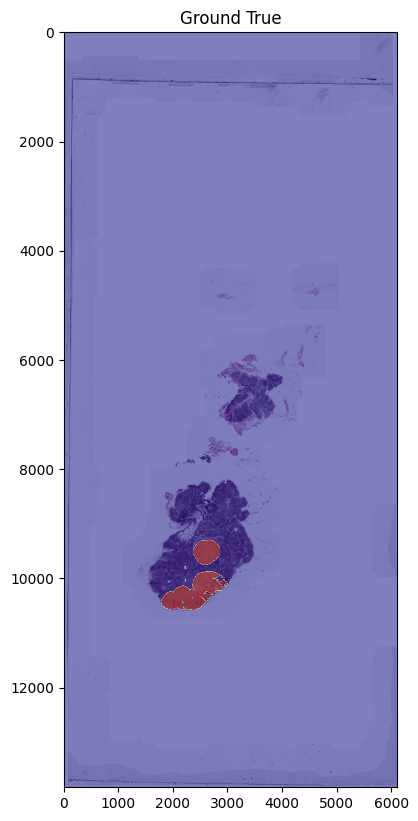

In [25]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(whole_test_image)
plt.imshow(whole_test_mask[:,:,0], cmap='jet', alpha=0.5)
plt.title("Ground True")

In [27]:
patches_paths = [test_image_dir4 +'/' + path for path in subset_df['path'].to_list()]
mask_paths = [path for path in subset_df['Mask Paths'].to_list()]
offsets = list(zip(subset_df.Xoffset.to_list(),subset_df.Yoffset.to_list()))
labels = subset_df.Labels.to_list()
probs = subset_df.prob.to_list()

predicted_mask = np.zeros(whole_test_image.shape)[:,:,0]
for offset, label, prob in zip(offsets, labels, probs):
      if prob > 0.8:
        predicted_mask[offset[1]:offset[1]+299, offset[0]:offset[0]+299] = 1

Text(0.5, 1.0, 'Predicted')

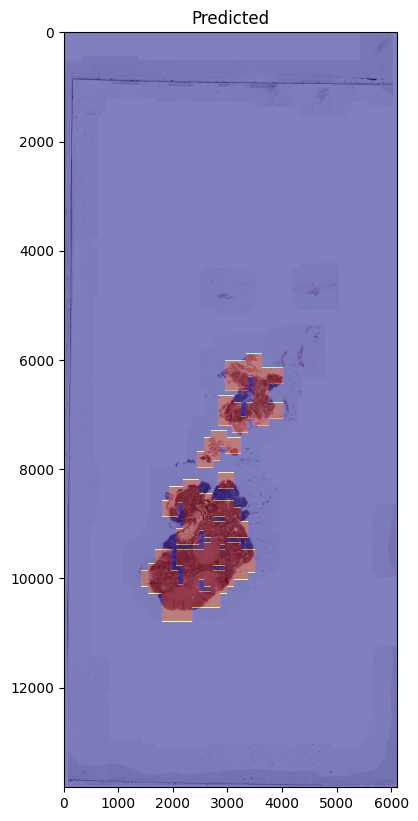

In [28]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(whole_test_image)
plt.imshow(predicted_mask, cmap='jet', alpha=0.5)
plt.title("Predicted")

# Multi Level

In [29]:
test_df = pd.read_csv('/content/multi_level_test_data.txt', header = None)
cols = ['Low Res Image Paths', 'High Res Image Paths', 'Low Res Xoffset', 'Low Res Yoffset', 'High Res Xoffset', 
                                                     'High Res Yoffset', 'Labels', 'slide code', 'Low Res Level', 'High Res Level']
test_df.columns = cols
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df['Labels'] = test_df['Labels'].astype(str)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
def data_generator_aug(train_datagen, df, train_image_dir):
    train_generator1 = train_datagen.flow_from_dataframe(
        dataframe = df,
        directory = train_image_dir,
        x_col = 'Low Res Image Paths',
        y_col = 'Labels',
        target_size = (IMG_SIZE, IMG_SIZE),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle=False
    )
    train_generator2 = train_datagen.flow_from_dataframe(
        dataframe = df,
        directory = train_image_dir,
        x_col = 'High Res Image Paths',
        y_col = 'Labels',
        target_size = (IMG_SIZE, IMG_SIZE),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle=False
    )
    while True:
        level1, label = next(train_generator1)
        level2 = next(train_generator2)[0]
        yield([level1, level2], label)

In [101]:
IMG_SIZE = 299
batch_size = 8

multi_test_generator = data_generator_aug(test_datagen, test_df, test_image_dir)

In [32]:
vgg_multi_resolution_model = tf.keras.models.load_model('/content/vgg_multi_resolution_model.h5')

In [42]:
print("Evaluate on test data")
results = vgg_multi_resolution_model.evaluate(multi_test_generator, steps = test_df.shape[0]//batch_size)
print("test loss, test acc:", results)

Evaluate on test data
159/159 [==============================] - 12s 73ms/step - loss: 0.8284 - accuracy: 0.6611
test loss, test acc: [0.8284096121788025, 0.6611374616622925]


In [87]:
y_true = []
i = 0
for data, label in multi_test_generator:
  y_true += label.tolist()
  i += 1
  if i >= test_df.shape[0]//batch_size:
    break

Found 1274 validated image filenames belonging to 2 classes.
Found 1274 validated image filenames belonging to 2 classes.


In [98]:
predictions = vgg_multi_resolution_model.predict(multi_test_generator, steps = test_df.shape[0]//batch_size)
tumor_prob = predictions[:,1]
y_pred = np.round(tumor_prob)
# y_pred = np.argmax(predictions, axis=-1)
y_true = test_df.Labels[:len(y_pred)].values.astype('int')

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       835
           1       0.00      0.00      0.00       431

    accuracy                           0.66      1266
   macro avg       0.33      0.50      0.40      1266
weighted avg       0.44      0.66      0.52      1266



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
